In [43]:
import numpy as np # linear algebra
import matplotlib
import matplotlib.pyplot as plt
import random
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import DataFrame

In [44]:
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import metrics
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model

In [45]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder

# Data

This dataset was originally contributed to the UCI Machine Learning repository nearly 30 years ago, mushroom hunting (otherwise known as "shrooming"). It helps to learn which features (inputs) spell certain death and which are most palatable in this dataset of mushroom characteristics. 

## Content

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

In [46]:


data= pd.read_csv('../data/mushrooms.csv') # we have inserted our data
data.shape



(8124, 23)

In [47]:
data.head(5) # usingg head will print desire number of row as in this we need 5.


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g




To be more understandable, let's write properties one by one.

classes: edible=e, poisonous=p

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d



# Changing input from letter to number

Since all the input variables are categorical, we can encode everything using LabelEncoder. For the target variable (class), 1 is poisonous and 0 is eatable.

In [48]:
labelencoder=LabelEncoder() # it convert the words data into number form
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Now we can seperate the input and target variables. As we have seen from above, the first variable is the target variable. The rest 22 variables are input variables.

In [49]:
input_sample = data.iloc[:, 1:23].values # here all column are input except first as it is numbering
target = data.iloc[:, 0].values # we have target value 0 and 1 only .


In [50]:
print(input_sample)

[[5 2 4 ... 2 3 5]
 [5 2 9 ... 3 2 1]
 [0 2 8 ... 3 2 3]
 ...
 [2 2 4 ... 0 1 2]
 [3 3 4 ... 7 4 2]
 [5 2 4 ... 4 1 2]]


Next we split the dataset into train and set. We will use 65% for training and 35% for testing.

In [51]:
input_sample_train, input_sample_test, target_train, target_test = train_test_split(input_sample, target, test_size = 0.35, random_state = 0)
input_sample_train.shape
# we have to use the names same as for both of them to test and train. Here test size 0.35 means we have splitted the train and test into 65% and test into 35%.

(5280, 22)

Here scaler, scales the input in same means and standard deviation. We have scaled the input_sample_train as input_sample_train_scaled and input_sample_test as input_sample_test_scaled. We use the same scaled in model fit down not the input_sample_test or train as it has been scaled now and we have to use the scaled value in required place.

In [52]:
scaler = StandardScaler()
input_sample_train_scaled = scaler.fit_transform(input_sample_train) # here input_sample_test is input variable that we have separated above
input_sample_test_scaled = scaler.fit_transform(input_sample_test) 

In [53]:
seed = 193 #generates a random number
discriminator_nodes =  16 # 20
discriminator_layers = 1
discriminator_epochs = 200
validation_fraction = 0.4
discriminator_dropout =  0.4
        
batchSize = 128 # 512
discriminator_optimizer = SGD(lr =0.01)
discriminator_history_array = []

In [57]:
# Create the model 

# Inputlayer
network_input = Input( shape = 22, name="Input layer") # here we used 22 because we are known that we have 22 input after splitting tha data
# Hidden layer 
neural_network_layer = Dense(discriminator_nodes, activation = "elu", name="HiddenLayer")(network_input)
# 0utput layer
neural_network_layer = Dense(1, activation = "sigmoid", name="OutputLayer")(neural_network_layer)
        
model = Model(inputs=network_input, outputs= neural_network_layer)
model.summary()
plot_model(model, to_file='classification_of_mushroom.pdf')

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input layer (InputLayer)     [(None, 22)]              0         
_________________________________________________________________
HiddenLayer (Dense)          (None, 16)                368       
_________________________________________________________________
OutputLayer (Dense)          (None, 1)                 17        
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


In [58]:
# compile_model

model.compile(loss = "binary_crossentropy", weighted_metrics = [metrics.binary_accuracy], optimizer = "adam", metrics=['accuracy'])

 In this we  are using the scaled value instead of the input_sample_train and input_sample_test but we can not cahnge the target as we have not scaled it ,changes are done only with scaled value.  we removed weight from the previous model because tensorflow automatically takes weight.

In [59]:
# fit_model
# Note: Always use a scaled name for input data.

discriminator_history = model.fit(input_sample_train_scaled, target_train.ravel(), epochs=discriminator_epochs, batch_size = batchSize, validation_data = (input_sample_test_scaled, target_test))
discriminator_history_array.append(discriminator_history) 

Epoch 1/200
42/42 [==============================] - 1s 15ms/step - loss: 0.6491 - accuracy: 0.6649 - binary_accuracy: 0.6649 - val_loss: 0.4348 - val_accuracy: 0.8175 - val_binary_accuracy: 0.8175
Epoch 2/200
42/42 [==============================] - 0s 12ms/step - loss: 0.3976 - accuracy: 0.8400 - binary_accuracy: 0.8400 - val_loss: 0.3169 - val_accuracy: 0.8755 - val_binary_accuracy: 0.8755
Epoch 3/200
42/42 [==============================] - 0s 9ms/step - loss: 0.3078 - accuracy: 0.8685 - binary_accuracy: 0.8685 - val_loss: 0.2670 - val_accuracy: 0.8970 - val_binary_accuracy: 0.8970
Epoch 4/200
42/42 [==============================] - 0s 10ms/step - loss: 0.2613 - accuracy: 0.9003 - binary_accuracy: 0.9003 - val_loss: 0.2399 - val_accuracy: 0.9103 - val_binary_accuracy: 0.9103
Epoch 5/200
42/42 [==============================] - 0s 9ms/step - loss: 0.2421 - accuracy: 0.9074 - binary_accuracy: 0.9074 - val_loss: 0.2204 - val_accuracy: 0.9212 - val_binary_accuracy: 0.9212
Epoch 6/200


42/42 [==============================] - 0s 7ms/step - loss: 0.0184 - accuracy: 0.9985 - binary_accuracy: 0.9985 - val_loss: 0.0172 - val_accuracy: 0.9986 - val_binary_accuracy: 0.9986
Epoch 43/200
42/42 [==============================] - 0s 6ms/step - loss: 0.0170 - accuracy: 0.9992 - binary_accuracy: 0.9992 - val_loss: 0.0162 - val_accuracy: 0.9989 - val_binary_accuracy: 0.9989
Epoch 44/200
42/42 [==============================] - 0s 5ms/step - loss: 0.0155 - accuracy: 0.9997 - binary_accuracy: 0.9997 - val_loss: 0.0155 - val_accuracy: 0.9989 - val_binary_accuracy: 0.9989
Epoch 45/200
42/42 [==============================] - 0s 7ms/step - loss: 0.0157 - accuracy: 0.9995 - binary_accuracy: 0.9995 - val_loss: 0.0147 - val_accuracy: 0.9989 - val_binary_accuracy: 0.9989
Epoch 46/200
42/42 [==============================] - 0s 5ms/step - loss: 0.0161 - accuracy: 0.9995 - binary_accuracy: 0.9995 - val_loss: 0.0138 - val_accuracy: 0.9989 - val_binary_accuracy: 0.9989
Epoch 47/200
42/42 [===

42/42 [==============================] - 0s 6ms/step - loss: 0.0032 - accuracy: 1.0000 - binary_accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000 - val_binary_accuracy: 1.0000
Epoch 84/200
42/42 [==============================] - 0s 8ms/step - loss: 0.0025 - accuracy: 1.0000 - binary_accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000 - val_binary_accuracy: 1.0000
Epoch 85/200
42/42 [==============================] - 0s 6ms/step - loss: 0.0027 - accuracy: 1.0000 - binary_accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000 - val_binary_accuracy: 1.0000
Epoch 86/200
42/42 [==============================] - 0s 7ms/step - loss: 0.0027 - accuracy: 1.0000 - binary_accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000 - val_binary_accuracy: 1.0000
Epoch 87/200
42/42 [==============================] - 0s 7ms/step - loss: 0.0026 - accuracy: 1.0000 - binary_accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000 - val_binary_accuracy: 1.0000
Epoch 88/200
42/42 [===

42/42 [==============================] - 0s 7ms/step - loss: 7.6510e-04 - accuracy: 1.0000 - binary_accuracy: 1.0000 - val_loss: 8.2967e-04 - val_accuracy: 1.0000 - val_binary_accuracy: 1.0000
Epoch 125/200
42/42 [==============================] - 0s 6ms/step - loss: 7.1298e-04 - accuracy: 1.0000 - binary_accuracy: 1.0000 - val_loss: 8.1443e-04 - val_accuracy: 1.0000 - val_binary_accuracy: 1.0000
Epoch 126/200
42/42 [==============================] - 0s 7ms/step - loss: 7.1346e-04 - accuracy: 1.0000 - binary_accuracy: 1.0000 - val_loss: 7.8554e-04 - val_accuracy: 1.0000 - val_binary_accuracy: 1.0000
Epoch 127/200
42/42 [==============================] - 0s 10ms/step - loss: 8.4260e-04 - accuracy: 1.0000 - binary_accuracy: 1.0000 - val_loss: 7.6165e-04 - val_accuracy: 1.0000 - val_binary_accuracy: 1.0000
Epoch 128/200
42/42 [==============================] - 0s 7ms/step - loss: 7.3635e-04 - accuracy: 1.0000 - binary_accuracy: 1.0000 - val_loss: 7.5074e-04 - val_accuracy: 1.0000 - val_bi

42/42 [==============================] - 0s 8ms/step - loss: 2.9604e-04 - accuracy: 1.0000 - binary_accuracy: 1.0000 - val_loss: 3.0490e-04 - val_accuracy: 1.0000 - val_binary_accuracy: 1.0000
Epoch 164/200
42/42 [==============================] - 0s 8ms/step - loss: 2.8913e-04 - accuracy: 1.0000 - binary_accuracy: 1.0000 - val_loss: 2.9322e-04 - val_accuracy: 1.0000 - val_binary_accuracy: 1.0000
Epoch 165/200
42/42 [==============================] - 0s 6ms/step - loss: 2.7752e-04 - accuracy: 1.0000 - binary_accuracy: 1.0000 - val_loss: 2.8546e-04 - val_accuracy: 1.0000 - val_binary_accuracy: 1.0000
Epoch 166/200
42/42 [==============================] - 0s 7ms/step - loss: 2.6800e-04 - accuracy: 1.0000 - binary_accuracy: 1.0000 - val_loss: 2.8001e-04 - val_accuracy: 1.0000 - val_binary_accuracy: 1.0000
Epoch 167/200
42/42 [==============================] - 0s 7ms/step - loss: 2.3838e-04 - accuracy: 1.0000 - binary_accuracy: 1.0000 - val_loss: 2.7353e-04 - val_accuracy: 1.0000 - val_bin

In [60]:
# predict_model
model_prediction_train = model.predict(input_sample_train_scaled).ravel() # We are predicting for training and ravel convert vertical into horizontal.
model_prediction_test = model.predict(input_sample_test_scaled).ravel() # We are predicting for testing and ravel does it works as above mentioned. 

#fpr means false positive rate, tpr means true positive rate and auc means area under curve and roc means reciever operating curve
fpr, tpr, threshold = roc_curve(target_train, model_prediction_train) # we are plotting the roc for model_predicion_train.
fpr_2, tpr_2, threshold_2 = roc_curve(target_test, model_prediction_test) # We are plotting the roc for model_predicition_test.
auc_1 = auc(fpr, tpr) # we are plotting the auc for input_sample_train.
auc_2 = auc(fpr_2, tpr_2) # we are plotting the auc for input_sample_test.

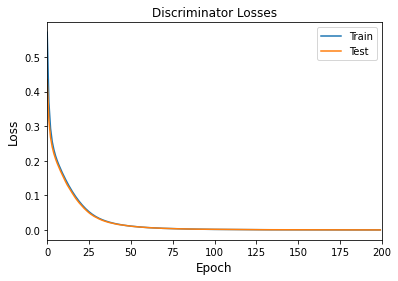

In [61]:
# plotLosses

plt.plot(discriminator_history.history['loss'])
plt.plot(discriminator_history.history['val_loss']) # val_loss means loss of test
plt.title('Discriminator Losses',fontsize='large')
plt.ylabel('Loss',fontsize='large')
plt.xlabel('Epoch',fontsize='large')
plt.xlim(0,discriminator_epochs)
plt.legend(['Train', 'Test'], loc='upper right') # here loc is used to keep the index place .
plt.savefig('losses.pdf')

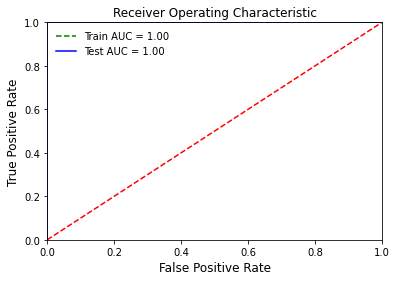

In [62]:
# plotRoc

plt.title('Receiver Operating Characteristic',fontsize='large')
plt.plot(fpr_2, tpr_2, 'g--', label='Train AUC = %0.2f'% auc_2)
plt.plot(fpr, tpr, 'b', label='Test AUC = %0.2f'% auc_1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.,1.])
plt.ylim([-0.,1.])
plt.ylabel('True Positive Rate', fontsize='large')
plt.xlabel('False Positive Rate', fontsize='large')
plt.legend(frameon=False)
plt.savefig('roc.pdf')

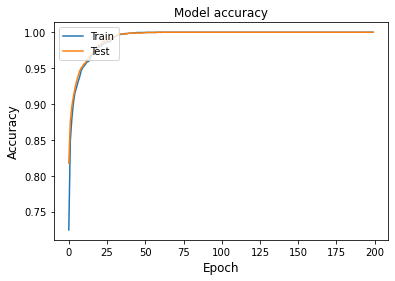

In [63]:
# plotAccuracy

plt.plot(discriminator_history.history['accuracy']) # here accuracy mean accuracy of training.
plt.plot(discriminator_history.history['val_accuracy']) # Here val accuracy means accuracy of testing.
plt.title('Model accuracy',fontsize='large')
plt.ylabel('Accuracy',fontsize='large')
plt.xlabel('Epoch',fontsize='large')
plt.legend(['Train', 'Test'], loc='upper left') # kepping the index place such as test and train.
plt.savefig('acc.pdf')

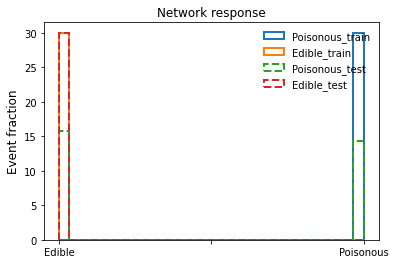

In [64]:
# plotSeparation
# here signal always approaches to 1 and background to 0.

signal_histo_train = [] # we have no data at beginning for both signal and background in train.
background_histo_train = []
signal_histo_test = []
background_histo_test = [] # we have no data at beginning for both signal and background in test.
for i in range(len(input_sample_train_scaled)):
    if target_train[i] == 1:
        signal_histo_train.append(model_prediction_train[i]) # append is used to add a single data at a time.
    if target_train[i] == 0:
        background_histo_train.append(model_prediction_train[i])
for i in range(len(input_sample_test_scaled)):
    if target_train[i] == 1:
        signal_histo_test.append(model_prediction_test[i])
    if target_test[i] == 0:
        background_histo_test.append(model_prediction_test[i])
        
plt.hist(signal_histo_train, range=[0., 1.], linewidth = 2, bins=30, histtype="step", density = True, label = "Poisonous_train")
plt.hist(background_histo_train, range=[0., 1.], linewidth = 2, bins=30, histtype="step", density = True, label = "Edible_train")
plt.hist(signal_histo_test, range=[0., 1.], linewidth = 2, bins=30, histtype="step", density = True, linestyle='dashed',  label = "Poisonous_test")
plt.hist(background_histo_test, range=[0., 1.], linewidth = 2, bins=30, histtype="step", density = True, linestyle='dashed', label = "Edible_test")
        
plt.legend()
plt.title('Network response',fontsize='large')
plt.xticks([0.0,0.5,1.0],["Edible","","Poisonous"],rotation=0)
# plt.xlabel('Network response', horizontalalignment='left', fontsize='large')
plt.ylabel('Event fraction', fontsize='large')
plt.legend(frameon=False)
#plt.show()
plt.savefig("separation_discriminator.pdf", dpi=400,  bbox_inches='tight')